# 1) Librerías

In [ ]:
import pandas as pd
from google.colab import drive
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score, roc_auc_score, classification_report, auc
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
import seaborn as sns
from sklearn.preprocessing import label_binarize
import numpy as np

# 2) Base de datos

Conectar con google drive:

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Base de datos características de estrellas:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Inteligencia Computacional/base final/base_final.csv')
df

,oid,MHPS_ratio_r,MHPS_low_r,MHPS_high_r,MHPS_non_zero_r,MHPS_PN_flag_r,MHPS_ratio_u,MHPS_low_u,MHPS_high_u,MHPS_non_zero_u,...,Skew_u,SmallKurtosis_u,Std_u,StetsonK_u,Pvar_u,ExcessVar_u,SF_ML_amplitude_u,SF_ML_gamma_u,IAR_phi_u,LinearTrend_u
0,lm0015n11071,-213832.968750,-0.006399,2.992754e-08,291.0,1.0,-72457.117188,-0.005275,7.280061e-08,362.0,...,0.803076,-0.272417,0.012998,0.844795,3.220021e-212,-0.000019,-0.5,-0.5,0.021181,-0.031519
1,lm0023m12980,-56381.589844,-0.003002,5.324946e-08,286.0,1.0,-226638.796875,-0.002772,1.223206e-08,320.0,...,0.133764,-0.925554,0.004153,0.907112,1.677522e-298,-0.000010,-0.5,-0.5,0.581580,0.020787
2,lm0032l22819,-25244.095703,-0.107407,4.254740e-06,212.0,1.0,-1222.345703,-0.083705,6.847918e-05,332.0,...,0.041732,-1.666204,0.327968,0.896915,9.997955e-01,-0.000057,-0.5,-0.5,0.155701,-1.582540
3,lm0052m21104,-2632.033936,-0.002273,8.634315e-07,207.0,1.0,-59448.789062,-0.002400,4.037621e-08,272.0,...,0.410038,-1.335150,0.019960,0.894080,6.762323e-67,-0.000007,-0.5,-0.5,0.002935,0.036498
4,lm0053l10895,-40.925228,-0.001024,2.502671e-05,239.0,1.0,-278.457428,-0.001165,4.184520e-06,256.0,...,-0.562079,-0.977299,0.085598,0.881707,1.000000e+00,0.000016,-0.5,-0.5,0.396251,0.594324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28510,lm0113m29583,-18922.892578,-0.010001,5.284944e-07,281.0,1.0,-27127.384766,-0.014792,5.452952e-07,247.0,...,-1.405817,1.153701,0.037683,0.807871,8.171960e-79,-0.000044,-0.5,-0.5,0.014763,0.153917
28511,lm0177l17089,-2951.441406,-0.008823,2.989501e-06,262.0,1.0,-1968.407349,-0.012400,6.299258e-06,302.0,...,-0.181708,-1.410365,0.087063,0.886734,9.146028e-11,-0.000022,-0.5,-0.5,0.251772,0.584192
28512,lm0185n21840,-78812.585938,-0.058346,7.403092e-07,253.0,1.0,-3708.965820,-0.033394,9.003542e-06,310.0,...,0.875225,-0.638533,0.088613,0.845227,4.377643e-63,-0.000086,-0.5,-0.5,0.160152,-0.464243
28513,lm0211l18119,-2319.257812,-0.005717,2.465198e-06,135.0,1.0,-24.829199,-0.002961,1.192628e-04,230.0,...,0.111543,-1.369580,0.251404,0.887148,1.000000e+00,0.000162,-0.5,-0.5,0.545671,1.317431


Base de datos con id de estrella, subclase y clase.

In [ ]:
merge = pd.read_csv('/content/drive/MyDrive/Inteligencia Computacional/base final/merge.csv')
merge = merge.rename(columns={'erosid': "oid"})
merge = merge.drop(['MagR',"ErrMR","ErrMB","XR","YR","MagB","XB","YB","Period"],  axis=1)

merge

,oid,Subclass,Class
0,lm0010k11782,1O,CEPH
1,lm0010k17018,1O,CEPH
2,lm0010l15466,1O,CEPH
3,lm0010l22132,1O,CEPH
4,lm0010l26829,1O,CEPH
...,...,...,...
28435,lm0743k14873,RRe,RRL
28436,lm0743n20115,RRe,RRL
28437,lm0744n6839,RRe,RRL
28438,lm0750n14226,RRe,RRL


Data procesada, que es el cruce entre ambas bases de datos anteriores por el "oid":

In [ ]:
data_procesada = pd.merge(df, merge, on='oid')
data_procesada = data_procesada.dropna()
data_procesada.reset_index(drop=True, inplace=True)
data_procesada

,oid,MHPS_ratio_r,MHPS_low_r,MHPS_high_r,MHPS_non_zero_r,MHPS_PN_flag_r,MHPS_ratio_u,MHPS_low_u,MHPS_high_u,MHPS_non_zero_u,...,Std_u,StetsonK_u,Pvar_u,ExcessVar_u,SF_ML_amplitude_u,SF_ML_gamma_u,IAR_phi_u,LinearTrend_u,Subclass,Class
0,lm0015n11071,-213832.968750,-0.006399,2.992754e-08,291.0,1.0,-72457.117188,-0.005275,7.280061e-08,362.0,...,0.012998,0.844795,3.220021e-212,-0.000019,-0.5,-0.5,0.021181,-0.031519,RRab,RRL
1,lm0023m12980,-56381.589844,-0.003002,5.324946e-08,286.0,1.0,-226638.796875,-0.002772,1.223206e-08,320.0,...,0.004153,0.907112,1.677522e-298,-0.000010,-0.5,-0.5,0.581580,0.020787,ED,EB
2,lm0032l22819,-25244.095703,-0.107407,4.254740e-06,212.0,1.0,-1222.345703,-0.083705,6.847918e-05,332.0,...,0.327968,0.896915,9.997955e-01,-0.000057,-0.5,-0.5,0.155701,-1.582540,RRab,RRL
3,lm0052m21104,-2632.033936,-0.002273,8.634315e-07,207.0,1.0,-59448.789062,-0.002400,4.037621e-08,272.0,...,0.019960,0.894080,6.762323e-67,-0.000007,-0.5,-0.5,0.002935,0.036498,ED,EB
4,lm0053l10895,-40.925228,-0.001024,2.502671e-05,239.0,1.0,-278.457428,-0.001165,4.184520e-06,256.0,...,0.085598,0.881707,1.000000e+00,0.000016,-0.5,-0.5,0.396251,0.594324,RRab,RRL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28346,lm0113m29583,-18922.892578,-0.010001,5.284944e-07,281.0,1.0,-27127.384766,-0.014792,5.452952e-07,247.0,...,0.037683,0.807871,8.171960e-79,-0.000044,-0.5,-0.5,0.014763,0.153917,RRab,RRL
28347,lm0177l17089,-2951.441406,-0.008823,2.989501e-06,262.0,1.0,-1968.407349,-0.012400,6.299258e-06,302.0,...,0.087063,0.886734,9.146028e-11,-0.000022,-0.5,-0.5,0.251772,0.584192,EC,EB
28348,lm0185n21840,-78812.585938,-0.058346,7.403092e-07,253.0,1.0,-3708.965820,-0.033394,9.003542e-06,310.0,...,0.088613,0.845227,4.377643e-63,-0.000086,-0.5,-0.5,0.160152,-0.464243,RRe,RRL
28349,lm0211l18119,-2319.257812,-0.005717,2.465198e-06,135.0,1.0,-24.829199,-0.002961,1.192628e-04,230.0,...,0.251404,0.887148,1.000000e+00,0.000162,-0.5,-0.5,0.545671,1.317431,RRab,RRL


# 3) Preprocesamiento de datos:

## 3.1) Número de estrellas por clase:

In [ ]:
estrellas_por_clase = data_procesada.groupby('Class')['oid'].count()
print(estrellas_por_clase)

Class
CEPH     2578
EB       9216
RRL     16557
Name: oid, dtype: int64


## 3.2) Número de estrellas por subclase:

In [ ]:
estrellas_por_subclase = data_procesada.groupby('Subclass')['oid'].count()
print(estrellas_por_subclase)

Subclass
1O           1026
1O_20_3O        3
1O_2O           2
1O_3O           2
2O             12
EC            719
ED           4730
ED_ESD        315
ED_TEB          3
ED_VAR         58
ELL_EC        147
ESD          3232
ESD_DPV        12
F            1480
F_10           51
F_10_20         2
RRab        11936
RRc          3294
RRd           644
RRe           683
Name: oid, dtype: int64


## 3.3) Normalizar características:

In [ ]:
# Separar data en targets y caracteristicas
target = data_procesada[["oid","Class","Subclass"]]
features = data_procesada.drop(["oid","Subclass","Class"],  axis=1)
# Definir una función para escalar
scaler = MinMaxScaler()
# Obtener características normalizadas
norm_features = pd.DataFrame(scaler.fit_transform(features), columns= features.columns)
# Juntar con características normalizadas con targets
data_final = pd.concat([target, norm_features], axis=1)
data_final

,oid,Class,Subclass,MHPS_ratio_r,MHPS_low_r,MHPS_high_r,MHPS_non_zero_r,MHPS_PN_flag_r,MHPS_ratio_u,MHPS_low_u,...,Skew_u,SmallKurtosis_u,Std_u,StetsonK_u,Pvar_u,ExcessVar_u,SF_ML_amplitude_u,SF_ML_gamma_u,IAR_phi_u,LinearTrend_u
0,lm0015n11071,RRL,RRab,0.999959,0.999989,0.000022,0.591667,0.0,0.999962,0.999999,...,0.475459,0.034438,0.015939,0.743003,3.220021e-212,0.999953,0.0,0.0,0.021181,0.474368
1,lm0023m12980,EB,ED,0.999989,0.999995,0.000039,0.577778,0.0,0.999881,1.000000,...,0.408839,0.020329,0.005084,0.847486,1.677522e-298,0.999953,0.0,0.0,0.581580,0.479426
2,lm0032l22819,RRL,RRab,0.999995,0.999817,0.003097,0.372222,0.0,0.999999,0.999988,...,0.399679,0.004329,0.402497,0.830389,9.997955e-01,0.999951,0.0,0.0,0.155701,0.324357
3,lm0052m21104,EB,ED,0.999999,0.999996,0.000629,0.358333,0.0,0.999969,1.000000,...,0.436338,0.011481,0.024483,0.825636,6.762323e-67,0.999953,0.0,0.0,0.002935,0.480946
4,lm0053l10895,RRL,RRab,1.000000,0.999998,0.018219,0.447222,0.0,1.000000,1.000000,...,0.339579,0.019211,0.105040,0.804890,1.000000e+00,0.999954,0.0,0.0,0.396251,0.534897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28346,lm0113m29583,RRL,RRab,0.999996,0.999983,0.000385,0.563889,0.0,0.999986,0.999998,...,0.255597,0.065244,0.046235,0.681096,8.171960e-79,0.999952,0.0,0.0,0.014763,0.492302
28347,lm0177l17089,EB,EC,0.999999,0.999985,0.002176,0.511111,0.0,0.999999,0.999998,...,0.377439,0.009856,0.106837,0.813320,9.146028e-11,0.999953,0.0,0.0,0.251772,0.533917
28348,lm0185n21840,RRL,RRe,0.999985,0.999900,0.000539,0.486111,0.0,0.999998,0.999995,...,0.482641,0.026529,0.108740,0.743728,4.377643e-63,0.999950,0.0,0.0,0.160152,0.432516
28349,lm0211l18119,RRL,RRab,1.000000,0.999990,0.001795,0.158333,0.0,1.000000,1.000000,...,0.406628,0.010737,0.308532,0.814013,1.000000e+00,0.999961,0.0,0.0,0.545671,0.604834


## 3.4) Balanceo de datos (oversampling y subsampling):

In [ ]:
X = data_final.drop(['oid'], axis=1)  # Features
y_class = data_final['Class']  # Etiquetas para la columna 'Class'
y_subclass = data_final['Subclass']  # Etiquetas para la columna 'Subclass'

# Oversampling con RandomOverSampler para la columna 'Class'
ros_class = RandomOverSampler(random_state=42)
X_resampled_class, y_resampled_class = ros_class.fit_resample(X, y_class)

# Oversampling con RandomOverSampler para la columna 'Subclass'
ros_subclass = RandomOverSampler(random_state=42)
X_resampled_subclass, y_resampled_subclass = ros_subclass.fit_resample(X, y_subclass)

# Subsampling con RandomUnderSampler para la columna 'Class'
rus_class = RandomUnderSampler(random_state=42)
X_subsampled_class, y_subsampled_class = rus_class.fit_resample(X, y_class)

# Subsampling con RandomUnderSampler para la columna 'Subclass'
rus_subclass = RandomUnderSampler(random_state=42)
X_subsampled_subclass, y_subsampled_subclass = rus_subclass.fit_resample(X, y_subclass)

# Ver los tamaños de las clases después de oversampling y subsampling
print("Tamaño de las clases 'Class' después de oversampling:\n", y_resampled_class.value_counts())
print("\nTamaño de las clases 'Subclass' después de oversampling:\n", y_resampled_subclass.value_counts())
print("\nTamaño de las clases 'Class' después de subsampling:\n", y_subsampled_class.value_counts())
print("\nTamaño de las clases 'Subclass' después de subsampling:\n", y_subsampled_subclass.value_counts())

Tamaño de las clases 'Class' después de oversampling:
 RRL     16557
EB      16557
CEPH    16557
Name: Class, dtype: int64

Tamaño de las clases 'Subclass' después de oversampling:
 RRab        11936
ED          11936
ED_TEB      11936
ESD_DPV     11936
2O          11936
1O_2O       11936
1O_3O       11936
1O_20_3O    11936
ED_VAR      11936
ED_ESD      11936
ELL_EC      11936
RRd         11936
1O          11936
F_10        11936
EC          11936
RRe         11936
RRc         11936
ESD         11936
F           11936
F_10_20     11936
Name: Subclass, dtype: int64

Tamaño de las clases 'Class' después de subsampling:
 CEPH    2578
EB      2578
RRL     2578
Name: Class, dtype: int64

Tamaño de las clases 'Subclass' después de subsampling:
 1O          2
1O_20_3O    2
RRd         2
RRc         2
RRab        2
F_10_20     2
F_10        2
F           2
ESD_DPV     2
ESD         2
ELL_EC      2
ED_VAR      2
ED_TEB      2
ED_ESD      2
ED          2
EC          2
2O          2
1O_3O       2

# 4) Modelos de clasificación:

## 4.1) Clasificar por clase de estrella:

Creamos un diccionario para guardar los resultados de los modelos:

In [ ]:
# Diccionario para almacenar las métricas y modelos
results = {}

### 4.1.1) Data Desbalanceada

Separar en conjuntos de entrenamiento y de testeo:

In [ ]:
X_desbalanced = X.drop(["Class","Subclass"],axis=1)
y_desbalanced = y_class

X_train, X_test, y_train, y_test = train_test_split(X_desbalanced, y_desbalanced, train_size=0.7, stratify=y_desbalanced, random_state=42)

Aplicamos un Grid Search a los hiperparámetros de un random Forest para encontrar el mejor modelo y graficamos sus métricas:

Accuracy: 0.9338875680169272 +/- 0.001212704078205229
Precision: 0.9289093204553946 +/- 0.0011864060272124277
Recall: 0.9258242538238498 +/- 2.760436566373592e-05
F1 Score: 0.9273451993179027 +/- 0.0005733270204910101


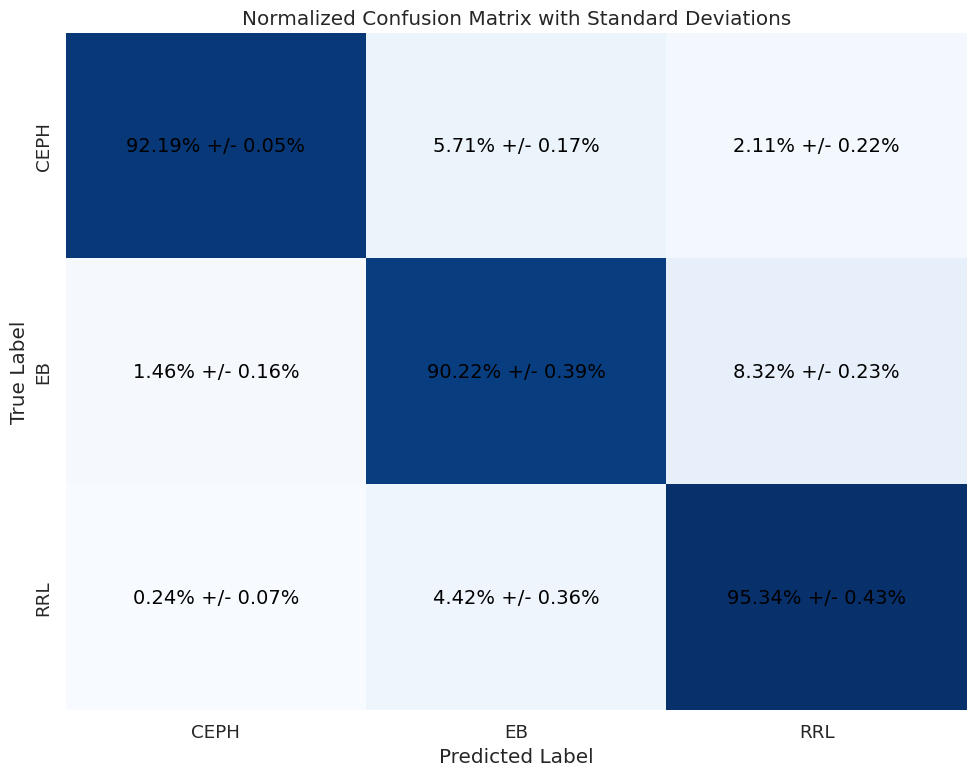

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el modelo
model = RandomForestClassifier()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

# Realizar la búsqueda en cuadrícula con validación cruzada de 3
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Guardar mejor modelo
best_model_desbalanced = best_model

# Realizar validación cruzada de 5 con StratifiedKFold
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Inicializar listas para almacenar resultados de cada fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
conf_matrices = []

# Iterar sobre los folds
for train_index, test_index in cv.split(X_train, y_train):
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    # Entrenar el mejor modelo con el fold de entrenamiento
    best_model.fit(X_fold_train, y_fold_train)

    # Obtener predicciones en el fold de prueba
    y_fold_pred = best_model.predict(X_fold_test)

    # Calcular métricas en el fold de prueba
    accuracy_list.append(accuracy_score(y_fold_test, y_fold_pred))
    precision_list.append(precision_score(y_fold_test, y_fold_pred, average='macro'))
    recall_list.append(recall_score(y_fold_test, y_fold_pred, average='macro'))
    f1_list.append(f1_score(y_fold_test, y_fold_pred, average='macro'))

    # Calcular matriz de confusión normalizada
    conf_matrix = confusion_matrix(y_fold_test, y_fold_pred, normalize='true')
    conf_matrices.append(conf_matrix)

# Calcular medias y desviaciones estándar de métricas
accuracy_mean = np.mean(accuracy_list)
accuracy_std = np.std(accuracy_list)

precision_mean = np.mean(precision_list)
precision_std = np.std(precision_list)

recall_mean = np.mean(recall_list)
recall_std = np.std(recall_list)

f1_mean = np.mean(f1_list)
f1_std = np.std(f1_list)

# Imprimir métricas con desviaciones estándar
print(f"Accuracy: {accuracy_mean} +/- {accuracy_std}")
print(f"Precision: {precision_mean} +/- {precision_std}")
print(f"Recall: {recall_mean} +/- {recall_std}")
print(f"F1 Score: {f1_mean} +/- {f1_std}")

# Calcular y graficar la matriz de confusión normalizada con desviaciones estándar
conf_matrices_mean = np.mean(conf_matrices, axis=0)
conf_matrices_std = np.std(conf_matrices, axis=0)

# Obtener las etiquetas ordenadas correctamente
sorted_labels = np.unique(np.concatenate([y_fold_test, y_fold_pred]))

# Configurar visualización con seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))

# Graficar matriz de confusión normalizada con desviaciones estándar
for i in range(len(sorted_labels)):
    for j in range(len(sorted_labels)):
        label = f"{conf_matrices_mean[i, j]*100:.2f}% +/- {conf_matrices_std[i, j]*100:.2f}%"
        text_position = (j + 0.5, i + 0.5)  # Añadir 0.5 para centrar el texto en la celda
        plt.text(*text_position, label, ha='center', va='center', color='black', fontsize=14)

sns.heatmap(conf_matrices_mean, annot=False, fmt=".2f", cmap="Blues", cbar=False, xticklabels=sorted_labels, yticklabels=sorted_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix with Standard Deviations")
plt.tight_layout()
plt.savefig('CM_clase_desbalanceada.png')
plt.show()


### 4.1.2) Data Oversampleada:

Separar en conjuntos de entrenamiento y de testeo:

In [ ]:
X_desbalanced = X.drop(["Class","Subclass"],axis=1)
y_desbalanced = y_class

X_train, X_test, y_train, y_test = train_test_split(X_desbalanced, y_desbalanced, train_size=0.7, stratify=y_desbalanced, random_state=42)

Hacemos un oversampling en el conjunto de entrenamiento:

In [ ]:
# Inicializar el objeto RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Aplicar Random Over Sampling para generar nuevos ejemplos
X_train, y_train = ros.fit_resample(X_train, y_train)

# Convertir los arrays resultantes a DataFrames si es necesario
X_train = pd.DataFrame(X_train, columns=X_train.columns)
y_train = pd.Series(y_train, name='Class')

# Imprimir el tamaño de las clases después del oversampling
print("Tamaño de las clases 'Class' en el conjunto de entrenamiento, después de oversampling:\n", y_train.value_counts())

Tamaño de las clases 'Class' en el conjunto de entrenamiento, después de oversampling:
 RRL     11589
EB      11589
CEPH    11589
Name: Class, dtype: int64


Aplicamos un Grid Search a los hiperparámetros de un random Forest para encontrar el mejor modelo y graficamos sus métricas:

Accuracy: 0.9639025504127139 +/- 2.9801174952881482e-05
Precision: 0.9639798823760002 +/- 5.816898100335921e-05
Recall: 0.963902588229828 +/- 2.932630216884169e-05
F1 Score: 0.9638408323037659 +/- 4.675947322602125e-05


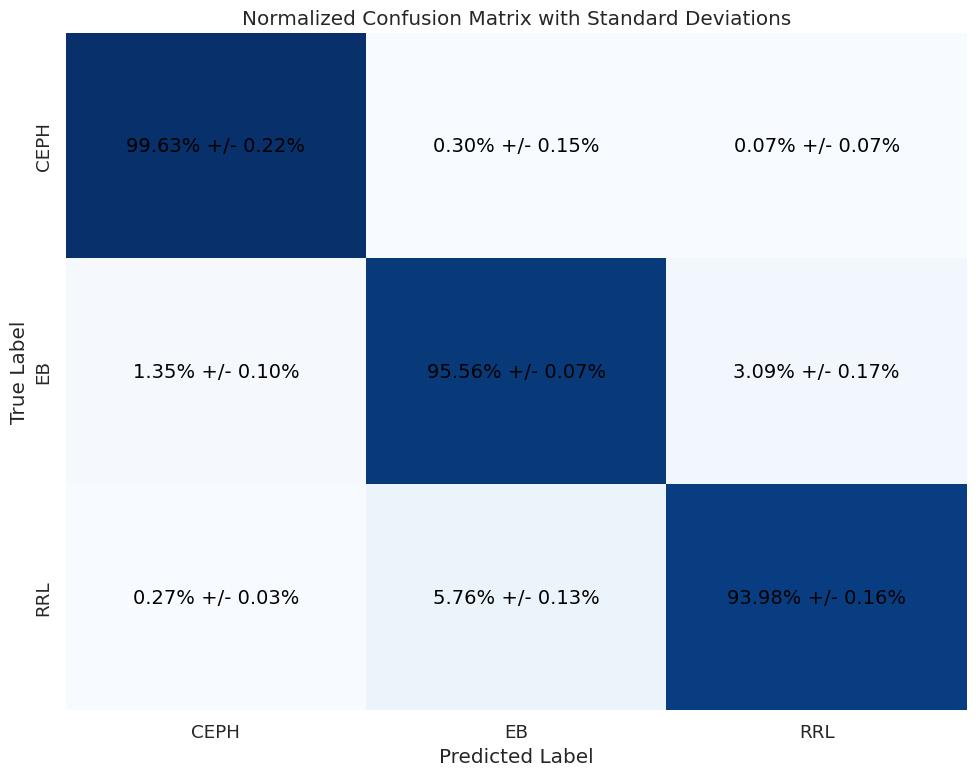

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el modelo
model = RandomForestClassifier()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

# Realizar la búsqueda en cuadrícula con validación cruzada de 3
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Guardamos el mejor modelo
best_model_oversampled = best_model

# Realizar validación cruzada de 5 con StratifiedKFold
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Inicializar listas para almacenar resultados de cada fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
conf_matrices = []

# Iterar sobre los folds
for train_index, test_index in cv.split(X_train, y_train):
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    # Entrenar el mejor modelo con el fold de entrenamiento
    best_model.fit(X_fold_train, y_fold_train)

    # Obtener predicciones en el fold de prueba
    y_fold_pred = best_model.predict(X_fold_test)

    # Calcular métricas en el fold de prueba
    accuracy_list.append(accuracy_score(y_fold_test, y_fold_pred))
    precision_list.append(precision_score(y_fold_test, y_fold_pred, average='macro'))
    recall_list.append(recall_score(y_fold_test, y_fold_pred, average='macro'))
    f1_list.append(f1_score(y_fold_test, y_fold_pred, average='macro'))

    # Calcular matriz de confusión normalizada
    conf_matrix = confusion_matrix(y_fold_test, y_fold_pred, normalize='true')
    conf_matrices.append(conf_matrix)

# Calcular medias y desviaciones estándar de métricas
accuracy_mean = np.mean(accuracy_list)
accuracy_std = np.std(accuracy_list)

precision_mean = np.mean(precision_list)
precision_std = np.std(precision_list)

recall_mean = np.mean(recall_list)
recall_std = np.std(recall_list)

f1_mean = np.mean(f1_list)
f1_std = np.std(f1_list)

# Imprimir métricas con desviaciones estándar
print(f"Accuracy: {accuracy_mean} +/- {accuracy_std}")
print(f"Precision: {precision_mean} +/- {precision_std}")
print(f"Recall: {recall_mean} +/- {recall_std}")
print(f"F1 Score: {f1_mean} +/- {f1_std}")

# Calcular y graficar la matriz de confusión normalizada con desviaciones estándar
conf_matrices_mean = np.mean(conf_matrices, axis=0)
conf_matrices_std = np.std(conf_matrices, axis=0)

# Obtener las etiquetas ordenadas correctamente
sorted_labels = np.unique(np.concatenate([y_fold_test, y_fold_pred]))

# Configurar visualización con seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))

# Graficar matriz de confusión normalizada con desviaciones estándar
for i in range(len(sorted_labels)):
    for j in range(len(sorted_labels)):
        label = f"{conf_matrices_mean[i, j]*100:.2f}% +/- {conf_matrices_std[i, j]*100:.2f}%"
        text_position = (j + 0.5, i + 0.5)  # Añadir 0.5 para centrar el texto en la celda
        plt.text(*text_position, label, ha='center', va='center', color='black', fontsize=14)

sns.heatmap(conf_matrices_mean, annot=False, fmt=".2f", cmap="Blues", cbar=False, xticklabels=sorted_labels, yticklabels=sorted_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix with Standard Deviations")
plt.tight_layout()
plt.savefig('CM_clase_oversampled.png')
plt.show()


### 4.1.3) Data Subsampleada:

Separar en conjuntos de entrenamiento y de testeo:

In [ ]:
X_desbalanced = X.drop(["Class","Subclass"],axis=1)
y_desbalanced = y_class

X_train, X_test, y_train, y_test = train_test_split(X_desbalanced, y_desbalanced, train_size=0.7, stratify=y_desbalanced, random_state=42)

Hacemos un subsampling en el conjunto de entrenamiento:

In [ ]:
# Subsampling con RandomUnderSampler para la columna 'Class'
rus_class = RandomUnderSampler(random_state=42)
X_train, y_train = rus_class.fit_resample(X_train, y_train)
print("Tamaño de las clases 'Class' en el conjunto de entrenamiento, después de subsampling:\n", y_train.value_counts())

Tamaño de las clases 'Class' en el conjunto de entrenamiento, después de subsampling:
 CEPH    1805
EB      1805
RRL     1805
Name: Class, dtype: int64


Aplicamos un Grid Search a los hiperparámetros de un random Forest para encontrar el mejor modelo:

Accuracy: 0.912280596451347 +/- 0.000570215956333997
Precision: 0.9128521681254167 +/- 2.486336144047474e-05
Recall: 0.9122758661896495 +/- 0.0005616901532953245
F1 Score: 0.9124474765206211 +/- 0.00036998120764675235


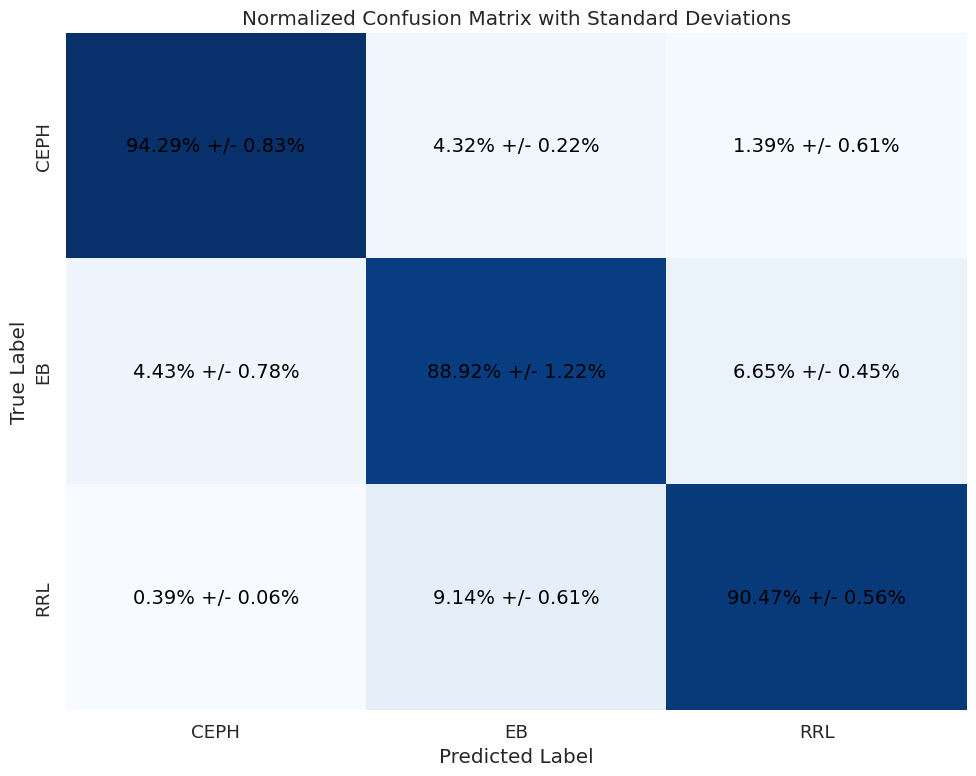

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el modelo
model = RandomForestClassifier()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

# Realizar la búsqueda en cuadrícula con validación cruzada de 3
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Guardar el mejor modelo
best_model_subsampled = best_model

# Realizar validación cruzada de 5 con StratifiedKFold
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Inicializar listas para almacenar resultados de cada fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
conf_matrices = []

# Iterar sobre los folds
for train_index, test_index in cv.split(X_train, y_train):
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    # Entrenar el mejor modelo con el fold de entrenamiento
    best_model.fit(X_fold_train, y_fold_train)

    # Obtener predicciones en el fold de prueba
    y_fold_pred = best_model.predict(X_fold_test)

    # Calcular métricas en el fold de prueba
    accuracy_list.append(accuracy_score(y_fold_test, y_fold_pred))
    precision_list.append(precision_score(y_fold_test, y_fold_pred, average='macro'))
    recall_list.append(recall_score(y_fold_test, y_fold_pred, average='macro'))
    f1_list.append(f1_score(y_fold_test, y_fold_pred, average='macro'))

    # Calcular matriz de confusión normalizada
    conf_matrix = confusion_matrix(y_fold_test, y_fold_pred, normalize='true')
    conf_matrices.append(conf_matrix)

# Calcular medias y desviaciones estándar de métricas
accuracy_mean = np.mean(accuracy_list)
accuracy_std = np.std(accuracy_list)

precision_mean = np.mean(precision_list)
precision_std = np.std(precision_list)

recall_mean = np.mean(recall_list)
recall_std = np.std(recall_list)

f1_mean = np.mean(f1_list)
f1_std = np.std(f1_list)

# Imprimir métricas con desviaciones estándar
print(f"Accuracy: {accuracy_mean} +/- {accuracy_std}")
print(f"Precision: {precision_mean} +/- {precision_std}")
print(f"Recall: {recall_mean} +/- {recall_std}")
print(f"F1 Score: {f1_mean} +/- {f1_std}")

# Calcular y graficar la matriz de confusión normalizada con desviaciones estándar
conf_matrices_mean = np.mean(conf_matrices, axis=0)
conf_matrices_std = np.std(conf_matrices, axis=0)

# Obtener las etiquetas ordenadas correctamente
sorted_labels = np.unique(np.concatenate([y_fold_test, y_fold_pred]))

# Configurar visualización con seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))

# Graficar matriz de confusión normalizada con desviaciones estándar
for i in range(len(sorted_labels)):
    for j in range(len(sorted_labels)):
        label = f"{conf_matrices_mean[i, j]*100:.2f}% +/- {conf_matrices_std[i, j]*100:.2f}%"
        text_position = (j + 0.5, i + 0.5)  # Añadir 0.5 para centrar el texto en la celda
        plt.text(*text_position, label, ha='center', va='center', color='black', fontsize=14)

sns.heatmap(conf_matrices_mean, annot=False, fmt=".2f", cmap="Blues", cbar=False, xticklabels=sorted_labels, yticklabels=sorted_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix with Standard Deviations")
plt.tight_layout()
plt.savefig('CM_clase_undersampled.png')
plt.show()

## 4.2) Clasificador por subclase, con enfoque directo:

### 4.3.1) Data Desbalanceada

Separar en conjuntos de entrenamiento y de testeo:

In [ ]:
X_desbalanced = X.drop(["Class","Subclass"],axis=1)
y_desbalanced = y_subclass

X_train, X_test, y_train, y_test = train_test_split(X_desbalanced, y_desbalanced, train_size=0.7, stratify=y_desbalanced, random_state=42)

Aplicamos un Grid Search a los hiperparámetros de un random Forest para encontrar el mejor modelo:

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/di

Accuracy: 0.752733647351082 +/- 0.0007683177804307939
Precision: 0.2979609745695433 +/- 0.01145197726448216
Recall: 0.24511046187027907 +/- 0.007221732227665034
F1 Score: 0.23834606944076756 +/- 0.007169329353830967


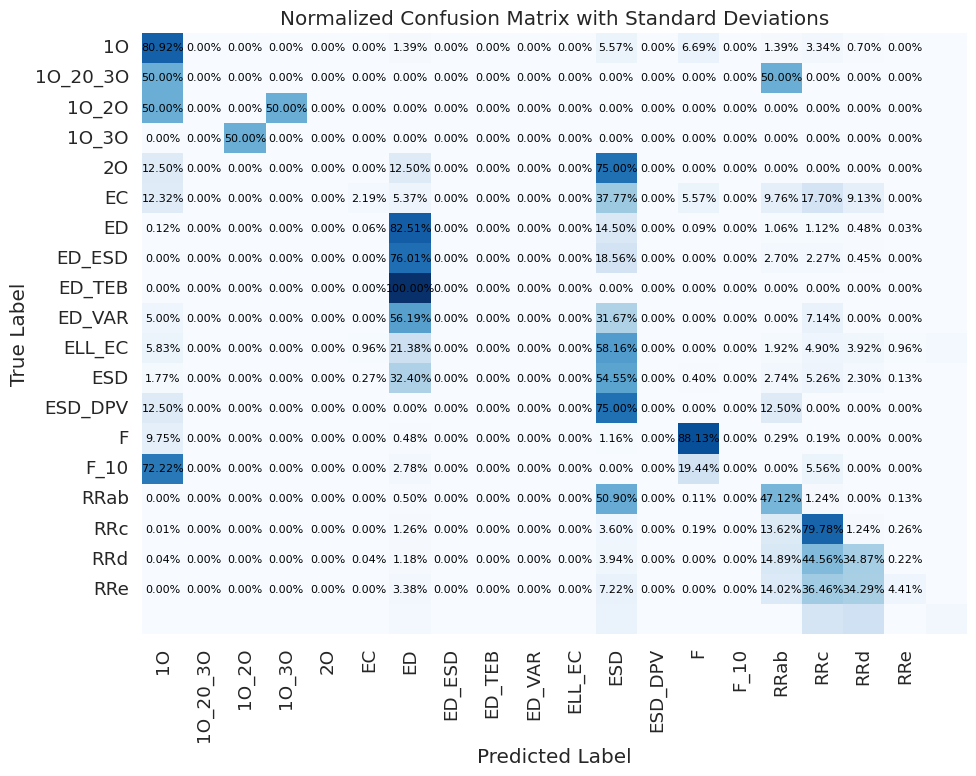

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el modelo
model = RandomForestClassifier()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

# Realizar la búsqueda en cuadrícula con validación cruzada de 3
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Guardar mejor modelo
best_model_desbalanced = best_model

# Realizar validación cruzada de 5 con StratifiedKFold
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Inicializar listas para almacenar resultados de cada fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
conf_matrices = []

# Iterar sobre los folds
for train_index, test_index in cv.split(X_train, y_train):
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    # Entrenar el mejor modelo con el fold de entrenamiento
    best_model.fit(X_fold_train, y_fold_train)

    # Obtener predicciones en el fold de prueba
    y_fold_pred = best_model.predict(X_fold_test)

    # Calcular métricas en el fold de prueba
    accuracy_list.append(accuracy_score(y_fold_test, y_fold_pred))
    precision_list.append(precision_score(y_fold_test, y_fold_pred, average='macro'))
    recall_list.append(recall_score(y_fold_test, y_fold_pred, average='macro'))
    f1_list.append(f1_score(y_fold_test, y_fold_pred, average='macro'))

    # Calcular matriz de confusión normalizada
    conf_matrix = confusion_matrix(y_fold_test, y_fold_pred, normalize='true')
    conf_matrices.append(conf_matrix)

# Calcular medias y desviaciones estándar de métricas
accuracy_mean = np.mean(accuracy_list)
accuracy_std = np.std(accuracy_list)

precision_mean = np.mean(precision_list)
precision_std = np.std(precision_list)

recall_mean = np.mean(recall_list)
recall_std = np.std(recall_list)

f1_mean = np.mean(f1_list)
f1_std = np.std(f1_list)

# Imprimir métricas con desviaciones estándar
print(f"Accuracy: {accuracy_mean} +/- {accuracy_std}")
print(f"Precision: {precision_mean} +/- {precision_std}")
print(f"Recall: {recall_mean} +/- {recall_std}")
print(f"F1 Score: {f1_mean} +/- {f1_std}")

# Calcular y graficar la matriz de confusión normalizada con desviaciones estándar
max_shape = max(conf_matrix.shape[0] for conf_matrix in conf_matrices if conf_matrix.shape[0] == conf_matrix.shape[1])
conf_matrices_mean = np.zeros((max_shape, max_shape), dtype=float)
conf_matrices_std = np.zeros((max_shape, max_shape), dtype=float)
count_matrices = 0

for conf_matrix in conf_matrices:
    if conf_matrix.shape[0] == conf_matrix.shape[1]:
        conf_matrices_mean[:conf_matrix.shape[0], :conf_matrix.shape[1]] += conf_matrix
        count_matrices += 1

# Calcular promedio
conf_matrices_mean /= count_matrices

# Obtener las etiquetas ordenadas correctamente
sorted_labels = np.unique(np.concatenate([y_fold_test, y_fold_pred]))

# Configurar visualización con seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))

# Graficar matriz de confusión normalizada con desviaciones estándar
for i in range(len(sorted_labels)):
    for j in range(len(sorted_labels)):
        label = f"{conf_matrices_mean[i, j]*100:.2f}%"
        text_position = (j + 0.5, i + 0.5)  # Añadir 0.5 para centrar el texto en la celda
        plt.text(*text_position, label, ha='center', va='center', color='black', fontsize=8)

sns.heatmap(conf_matrices_mean, annot=False, fmt=".2f", cmap="Blues", cbar=False, xticklabels=sorted_labels, yticklabels=sorted_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix with Standard Deviations")
plt.tight_layout()
plt.savefig('CM_subclase_directo_desbalanceada.png')
plt.show()


### 4.3.2) Data Oversampleada:

Separar en conjuntos de entrenamiento y de testeo:

In [ ]:
X_desbalanced = X.drop(["Class","Subclass"],axis=1)
y_desbalanced = y_subclass

X_train, X_test, y_train, y_test = train_test_split(X_desbalanced, y_desbalanced, train_size=0.6, stratify=y_desbalanced, random_state=42)

Hacemos un oversampling en el conjunto de entrenamiento:

In [ ]:
# Oversampling con RandomOverSampler para la columna 'Class'
ros_class = RandomOverSampler(random_state=42)
X_train, y_train = ros_class.fit_resample(X_train, y_train)
print("Tamaño de las clases 'Class' en el conjunto de entrenamiento, después de oversampling:\n", y_train.value_counts())

Tamaño de las clases 'Class' en el conjunto de entrenamiento, después de oversampling:
 RRe         7161
RRc         7161
1O_2O       7161
1O_20_3O    7161
1O_3O       7161
ED_TEB      7161
ESD_DPV     7161
2O          7161
ED_VAR      7161
F_10        7161
ELL_EC      7161
ED_ESD      7161
1O          7161
RRd         7161
EC          7161
ESD         7161
F           7161
ED          7161
RRab        7161
F_10_20     7161
Name: Subclass, dtype: int64


Aplicamos un Grid Search a los hiperparámetros de un random Forest para encontrar el mejor modelo:

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el modelo
model = RandomForestClassifier()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

# Realizar la búsqueda en cuadrícula con validación cruzada de 3
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Guardar mejor modelo
best_model_desbalanced = best_model

# Realizar validación cruzada de 5 con StratifiedKFold
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Inicializar listas para almacenar resultados de cada fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
conf_matrices = []

# Iterar sobre los folds
for train_index, test_index in cv.split(X_train, y_train):
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    # Entrenar el mejor modelo con el fold de entrenamiento
    best_model.fit(X_fold_train, y_fold_train)

    # Obtener predicciones en el fold de prueba
    y_fold_pred = best_model.predict(X_fold_test)

    # Calcular métricas en el fold de prueba
    accuracy_list.append(accuracy_score(y_fold_test, y_fold_pred))
    precision_list.append(precision_score(y_fold_test, y_fold_pred, average='macro'))
    recall_list.append(recall_score(y_fold_test, y_fold_pred, average='macro'))
    f1_list.append(f1_score(y_fold_test, y_fold_pred, average='macro'))

    # Calcular matriz de confusión normalizada
    conf_matrix = confusion_matrix(y_fold_test, y_fold_pred, normalize='true')
    conf_matrices.append(conf_matrix)

# Calcular medias y desviaciones estándar de métricas
accuracy_mean = np.mean(accuracy_list)
accuracy_std = np.std(accuracy_list)

precision_mean = np.mean(precision_list)
precision_std = np.std(precision_list)

recall_mean = np.mean(recall_list)
recall_std = np.std(recall_list)

f1_mean = np.mean(f1_list)
f1_std = np.std(f1_list)

# Imprimir métricas con desviaciones estándar
print(f"Accuracy: {accuracy_mean} +/- {accuracy_std}")
print(f"Precision: {precision_mean} +/- {precision_std}")
print(f"Recall: {recall_mean} +/- {recall_std}")
print(f"F1 Score: {f1_mean} +/- {f1_std}")

# Calcular y graficar la matriz de confusión normalizada con desviaciones estándar
max_shape = max(conf_matrix.shape[0] for conf_matrix in conf_matrices if conf_matrix.shape[0] == conf_matrix.shape[1])
conf_matrices_mean = np.zeros((max_shape, max_shape), dtype=float)
conf_matrices_std = np.zeros((max_shape, max_shape), dtype=float)
count_matrices = 0

for conf_matrix in conf_matrices:
    if conf_matrix.shape[0] == conf_matrix.shape[1]:
        conf_matrices_mean[:conf_matrix.shape[0], :conf_matrix.shape[1]] += conf_matrix
        count_matrices += 1

# Calcular promedio
conf_matrices_mean /= count_matrices

# Obtener las etiquetas ordenadas correctamente
sorted_labels = np.unique(np.concatenate([y_fold_test, y_fold_pred]))

# Configurar visualización con seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))

# Graficar matriz de confusión normalizada con desviaciones estándar
for i in range(len(sorted_labels)):
    for j in range(len(sorted_labels)):
        label = f"{conf_matrices_mean[i, j]*100:.2f}%"
        text_position = (j + 0.5, i + 0.5)  # Añadir 0.5 para centrar el texto en la celda
        plt.text(*text_position, label, ha='center', va='center', color='black', fontsize=8)

sns.heatmap(conf_matrices_mean, annot=False, fmt=".2f", cmap="Blues", cbar=False, xticklabels=sorted_labels, yticklabels=sorted_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix with Standard Deviations")
plt.tight_layout()
plt.savefig('CM_subclase_directo_oversampled.png')
plt.show()


## 4.3) Clasificar por subclase, con enfoque jerárquico:

En primer lugar, ocupamos el mejor clasificador por clase, clasificamos la data completa, y separamos en datasets según la clase predicha:

In [ ]:
X_desbalanced = X.drop(["Class","Subclass"],axis=1)
y_desbalanced = y_subclass

# Mejor clasificador por clase de estrella
rf_class = best_model_oversampled
class_predictions = rf_class.predict(X_desbalanced)

# Copiamos las predicciones al conjunto X_desbalanced
X_desbalanced_with_predictions = X_desbalanced.copy()
X_desbalanced_with_predictions['Class_Predictions'] = class_predictions
X_desbalanced_with_predictions['Subclass'] = y_subclass

# Filtrar según clase
X_desbalanced_CEPH = X_desbalanced_with_predictions[X_desbalanced_with_predictions['Class_Predictions'] == 'CEPH']
X_desbalanced_RRL = X_desbalanced_with_predictions[X_desbalanced_with_predictions['Class_Predictions'] == 'RRL']
X_desbalanced_EB = X_desbalanced_with_predictions[X_desbalanced_with_predictions['Class_Predictions'] == 'EB']

# Lista de dataframes
datas = [ X_desbalanced_CEPH, X_desbalanced_RRL, X_desbalanced_EB]

### 4.3.1) Data Desbalanceada:

Accuracy: 0.87375 +/- 0.006249999999999978
Precision: 0.8519058804521418 +/- 0.03665572975895309
Recall: 0.2021080368906456 +/- 0.03847167325428197
F1 Score: 0.20736661847884652 +/- 0.03892389003611804


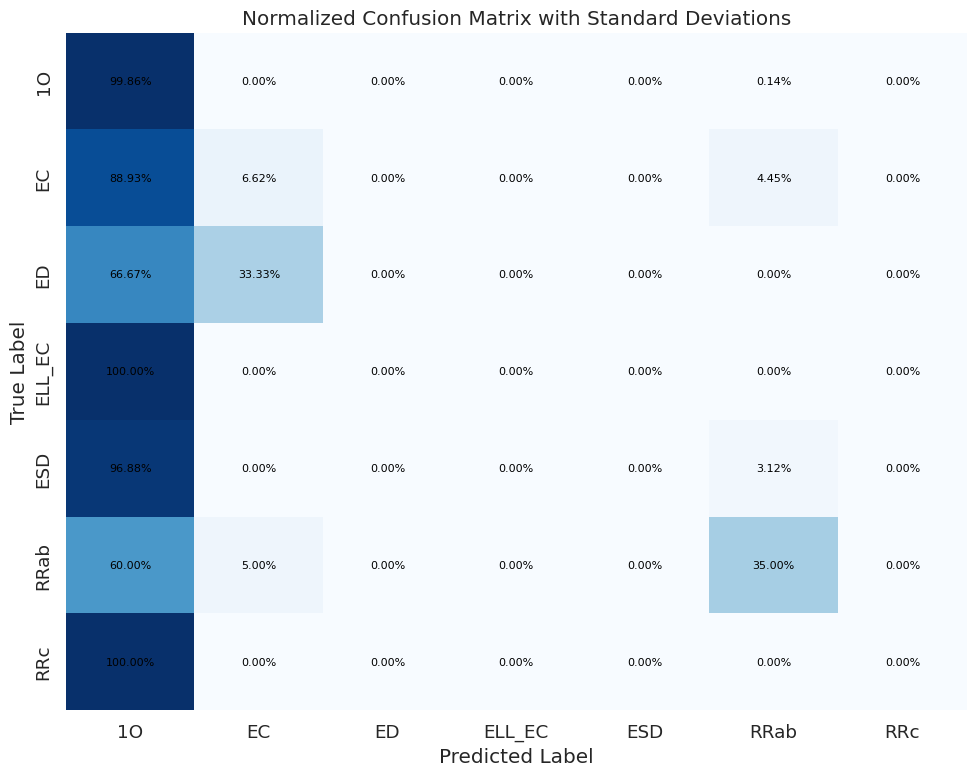

Accuracy: 0.897179340575567 +/- 0.0035258242805412676
Precision: 0.961502957645267 +/- 0.0005959641476941391
Recall: 0.24131436923377264 +/- 0.0031325885060473346
F1 Score: 0.24372058668243526 +/- 0.0021189659562618757


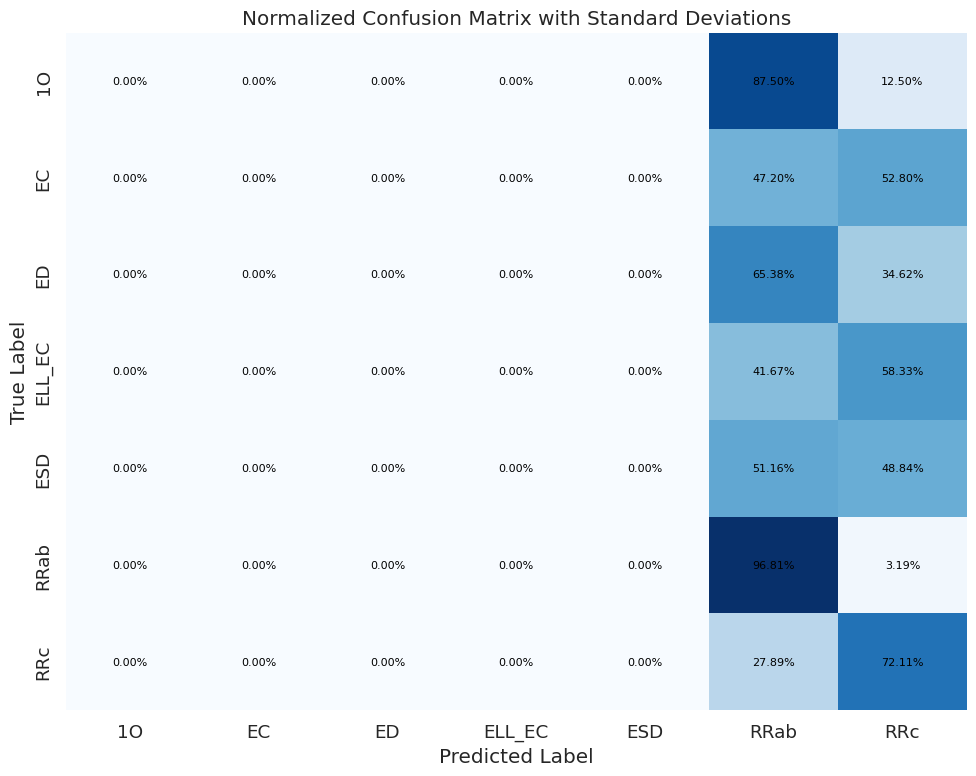

Accuracy: 0.6635777825094338 +/- 0.012348143416492208
Precision: 0.776616111142852 +/- 0.07170333013963942
Recall: 0.22852218077913866 +/- 0.004273670222937315
F1 Score: 0.22691801092956937 +/- 0.0032873763398067885


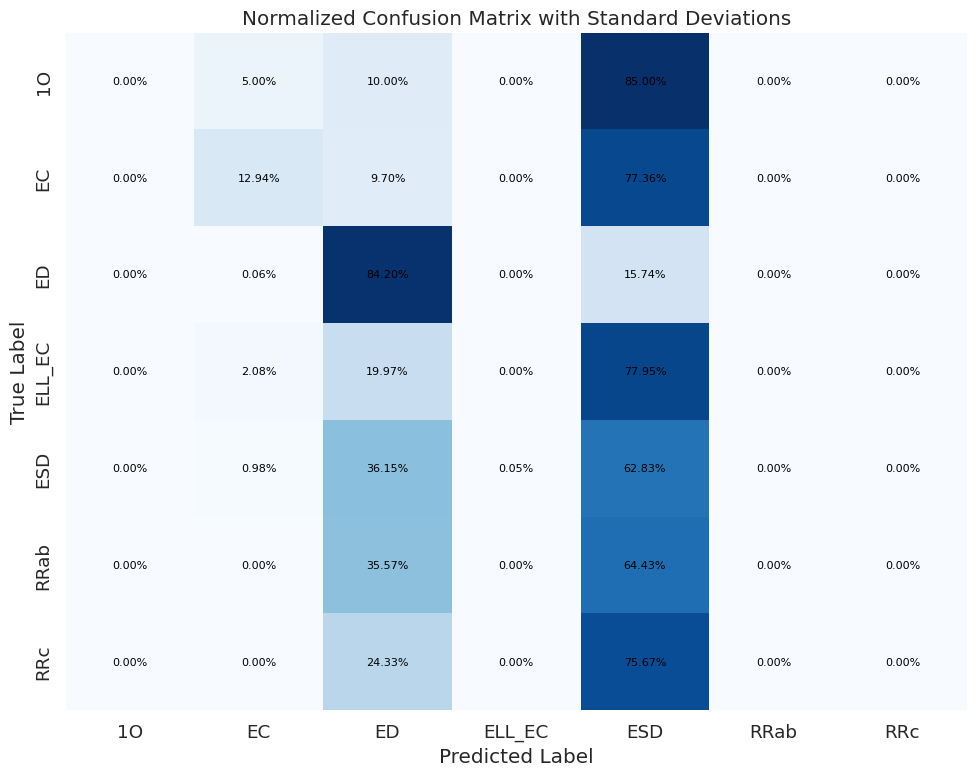

In [ ]:
# Inicializar listas para almacenar resultados de todos los DF
all_accuracy_list = []
all_precision_list = []
all_recall_list = []
all_f1_list = []
all_conf_matrices = []

for df in datas:
  threshold = 4
  class_counts = y_desbalanced.value_counts()
  valid_classes = class_counts[class_counts >= threshold].index
  df_filtered = df[df['Subclass'].isin(valid_classes)]

  # Definimos X e y
  X_desbalanced = df_filtered.drop(["Class_Predictions", "Subclass"], axis=1)
  y_desbalanced = df_filtered["Subclass"]

  # Separamos en train-test
  X_train, X_test, y_train, y_test = train_test_split(X_desbalanced, y_desbalanced, train_size=0.7, stratify=y_desbalanced, random_state=42)

  # Definir el modelo
  model = RandomForestClassifier()

  # Definir el espacio de búsqueda de hiperparámetros
  param_grid = {
      'n_estimators': [50, 100, 200],
      'max_depth': [10, 20, 30]
  }

  # Realizar la búsqueda en cuadrícula con validación cruzada de 3
  grid_search = GridSearchCV(model, param_grid, cv=2)
  grid_search.fit(X_train, y_train)

  # Obtener el mejor modelo
  best_model = grid_search.best_estimator_

  # Guardar mejor modelo
  best_model_desbalanced = best_model

  # Realizar validación cruzada de 5 con StratifiedKFold
  cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

  # Inicializar listas para almacenar resultados de cada fold
  accuracy_list = []
  precision_list = []
  recall_list = []
  f1_list = []
  conf_matrices = []

  # Iterar sobre los folds
  for train_index, test_index in cv.split(X_train, y_train):
      X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
      y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

      # Entrenar el mejor modelo con el fold de entrenamiento
      best_model.fit(X_fold_train, y_fold_train)

      # Obtener predicciones en el fold de prueba
      y_fold_pred = best_model.predict(X_fold_test)

      # Calcular métricas en el fold de prueba
      accuracy_list.append(accuracy_score(y_fold_test, y_fold_pred))
      precision_list.append(precision_score(y_fold_test, y_fold_pred, average='macro', zero_division=1))
      recall_list.append(recall_score(y_fold_test, y_fold_pred, average='macro', zero_division=1))
      f1_list.append(f1_score(y_fold_test, y_fold_pred, average='macro', zero_division=1))

      # Calcular matriz de confusión normalizada
      conf_matrix = confusion_matrix(y_fold_test, y_fold_pred, normalize='true')
      conf_matrices.append(conf_matrix)

  # Calcular medias y desviaciones estándar de métricas
  accuracy_mean = np.mean(accuracy_list)
  accuracy_std = np.std(accuracy_list)

  precision_mean = np.mean(precision_list)
  precision_std = np.std(precision_list)

  recall_mean = np.mean(recall_list)
  recall_std = np.std(recall_list)

  f1_mean = np.mean(f1_list)
  f1_std = np.std(f1_list)

  # Imprimir métricas con desviaciones estándar
  print(f"Accuracy: {accuracy_mean} +/- {accuracy_std}")
  print(f"Precision: {precision_mean} +/- {precision_std}")
  print(f"Recall: {recall_mean} +/- {recall_std}")
  print(f"F1 Score: {f1_mean} +/- {f1_std}")

  # Calcular y graficar la matriz de confusión normalizada con desviaciones estándar
  max_shape = max(conf_matrix.shape[0] for conf_matrix in conf_matrices if conf_matrix.shape[0] == conf_matrix.shape[1])
  conf_matrices_mean = np.zeros((max_shape, max_shape), dtype=float)
  conf_matrices_std = np.zeros((max_shape, max_shape), dtype=float)
  count_matrices = 0

  for conf_matrix in conf_matrices:
      if conf_matrix.shape[0] == conf_matrix.shape[1]:
          conf_matrices_mean[:conf_matrix.shape[0], :conf_matrix.shape[1]] += conf_matrix
          count_matrices += 1

  # Calcular promedio
  conf_matrices_mean /= count_matrices

  # Obtener las etiquetas ordenadas correctamente
  sorted_labels = np.unique(np.concatenate([y_fold_test, y_fold_pred]))

  # Configurar visualización con seaborn
  sns.set(font_scale=1.2)
  plt.figure(figsize=(10, 8))

  # Graficar matriz de confusión normalizada con desviaciones estándar
  for i in range(len(sorted_labels)):
      for j in range(len(sorted_labels)):
          label = f"{conf_matrices_mean[i, j]*100:.2f}%"
          text_position = (j + 0.5, i + 0.5)  # Añadir 0.5 para centrar el texto en la celda
          plt.text(*text_position, label, ha='center', va='center', color='black', fontsize=8)

  sns.heatmap(conf_matrices_mean, annot=False, fmt=".2f", cmap="Blues", cbar=False, xticklabels=sorted_labels, yticklabels=sorted_labels)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Normalized Confusion Matrix with Standard Deviations")
  plt.tight_layout()
  plt.show()

  # Almacenar métricas y matrices de confusión de cada iteración
  all_accuracy_list.append(accuracy_list)
  all_precision_list.append(precision_list)
  all_recall_list.append(recall_list)
  all_f1_list.append(f1_list)
  all_conf_matrices.extend(conf_matrices)


All DataFrames - Accuracy: 0.811502374361667 +/- 0.10535806391312934
All DataFrames - Precision: 0.8633416497467535 +/- 0.08901891837204053
All DataFrames - Recall: 0.22398152896785228 +/- 0.02773470471637624
All DataFrames - F1 Score: 0.2260017386969504 +/- 0.02703350334768138


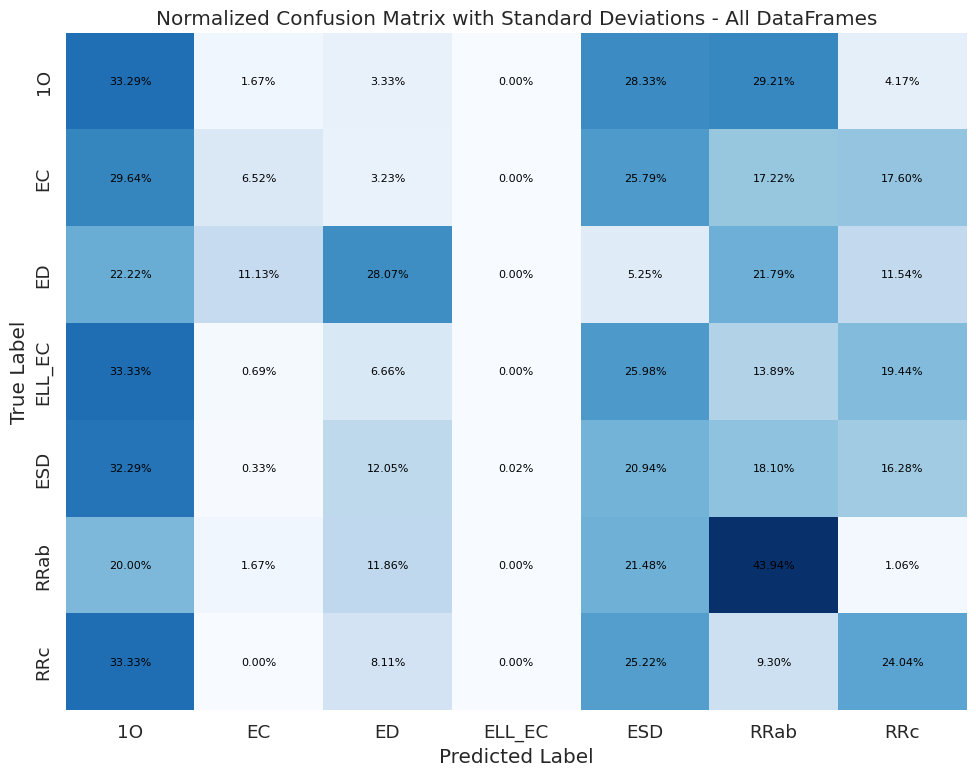

In [ ]:
# Calcular métricas promedio de todos los DF
all_accuracy_mean = np.mean(all_accuracy_list)
all_accuracy_std = np.std(all_accuracy_list)

all_precision_mean = np.mean(all_precision_list)
all_precision_std = np.std(all_precision_list)

all_recall_mean = np.mean(all_recall_list)
all_recall_std = np.std(all_recall_list)

all_f1_mean = np.mean(all_f1_list)
all_f1_std = np.std(all_f1_list)

# Imprimir métricas promedio con desviaciones estándar
print(f"All DataFrames - Accuracy: {all_accuracy_mean} +/- {all_accuracy_std}")
print(f"All DataFrames - Precision: {all_precision_mean} +/- {all_precision_std}")
print(f"All DataFrames - Recall: {all_recall_mean} +/- {all_recall_std}")
print(f"All DataFrames - F1 Score: {all_f1_mean} +/- {all_f1_std}")

# Calcular y graficar la matriz de confusión normalizada con desviaciones estándar para todos los DF
max_shape = max(conf_matrix.shape[0] for conf_matrix in all_conf_matrices if conf_matrix.shape[0] == conf_matrix.shape[1])
conf_matrices_mean_all = np.zeros((max_shape, max_shape), dtype=float)
count_matrices_all = 0

for conf_matrix in all_conf_matrices:
    if conf_matrix.shape[0] == conf_matrix.shape[1]:
        conf_matrices_mean_all[:conf_matrix.shape[0], :conf_matrix.shape[1]] += conf_matrix
        count_matrices_all += 1

# Calcular promedio
conf_matrices_mean_all /= count_matrices_all

# Obtener las etiquetas ordenadas correctamente
sorted_labels_all = np.unique(np.concatenate([y_fold_test, y_fold_pred]))

# Configurar visualización con seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))

# Graficar matriz de confusión normalizada con desviaciones estándar para todos los DF
for i in range(len(sorted_labels_all)):
    for j in range(len(sorted_labels_all)):
        label_all = f"{conf_matrices_mean_all[i, j]*100:.2f}%"
        text_position_all = (j + 0.5, i + 0.5)  # Añadir 0.5 para centrar el texto en la celda
        plt.text(*text_position_all, label_all, ha='center', va='center', color='black', fontsize=8)

sns.heatmap(conf_matrices_mean_all, annot=False, fmt=".2f", cmap="Blues", cbar=False, xticklabels=sorted_labels_all, yticklabels=sorted_labels_all)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix with Standard Deviations - All DataFrames")
plt.tight_layout()
plt.savefig('CM_subclase_directo_all.png')
plt.show()

### 4.3.2) Data oversampleada:

Accuracy: 0.9989648033126294 +/- 0.00020703933747412417
Precision: 0.9989725443988586 +/- 0.000204071492454716
Recall: 0.9989648033126295 +/- 0.00020703933747412417
F1 Score: 0.9989647880920951 +/- 0.00020704760010625822


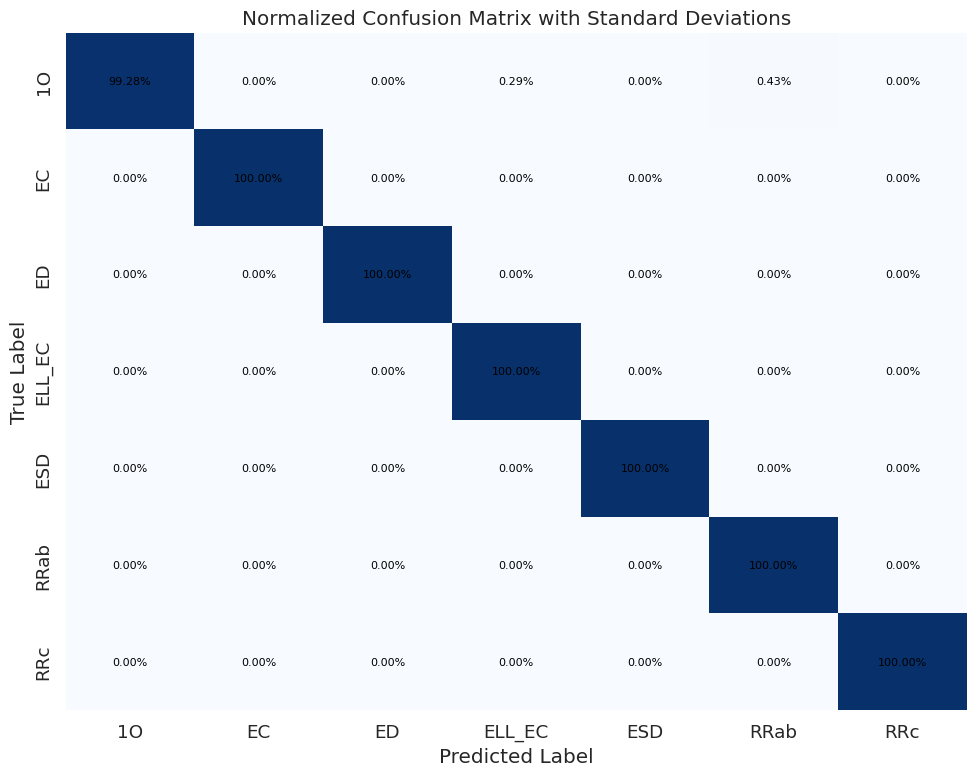

Accuracy: 0.9848426030491249 +/- 0.0012528232636928593
Precision: 0.9856783944598239 +/- 0.0011196858767745788
Recall: 0.9848426030491249 +/- 0.0012528232636927483
F1 Score: 0.9848175423869672 +/- 0.0012590197424345306


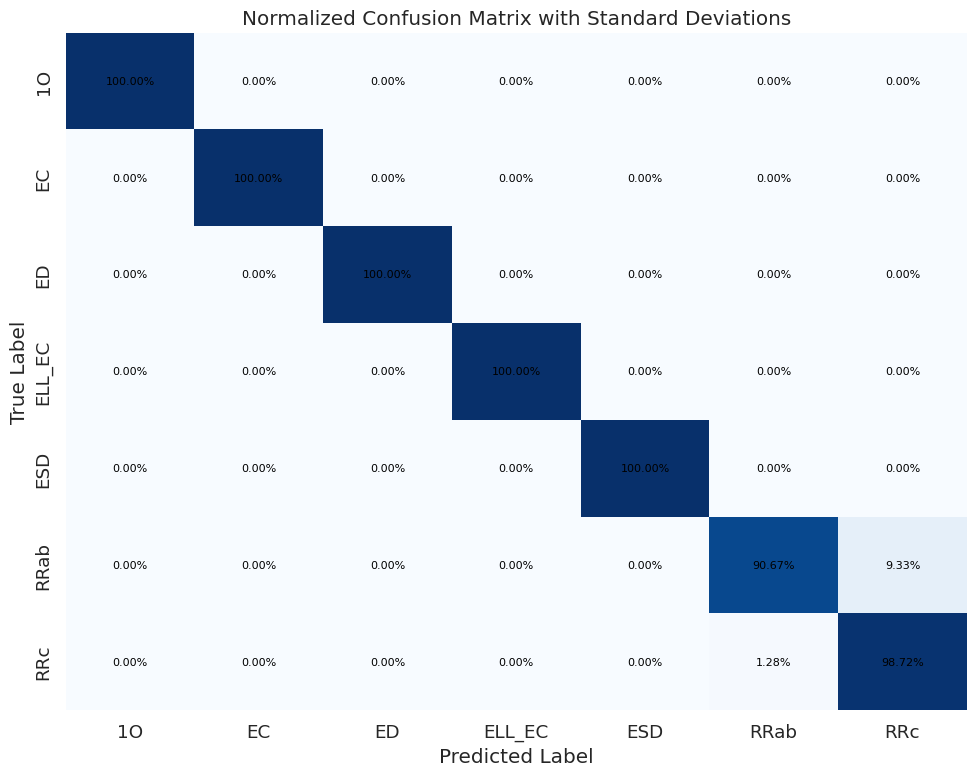

Accuracy: 0.9366531151320174 +/- 0.001048374804377139
Precision: 0.9358465303695395 +/- 0.0006442540461097934
Recall: 0.9366528626063739 +/- 0.0010644822520743946
F1 Score: 0.9360188081038038 +/- 0.0009372648085802515


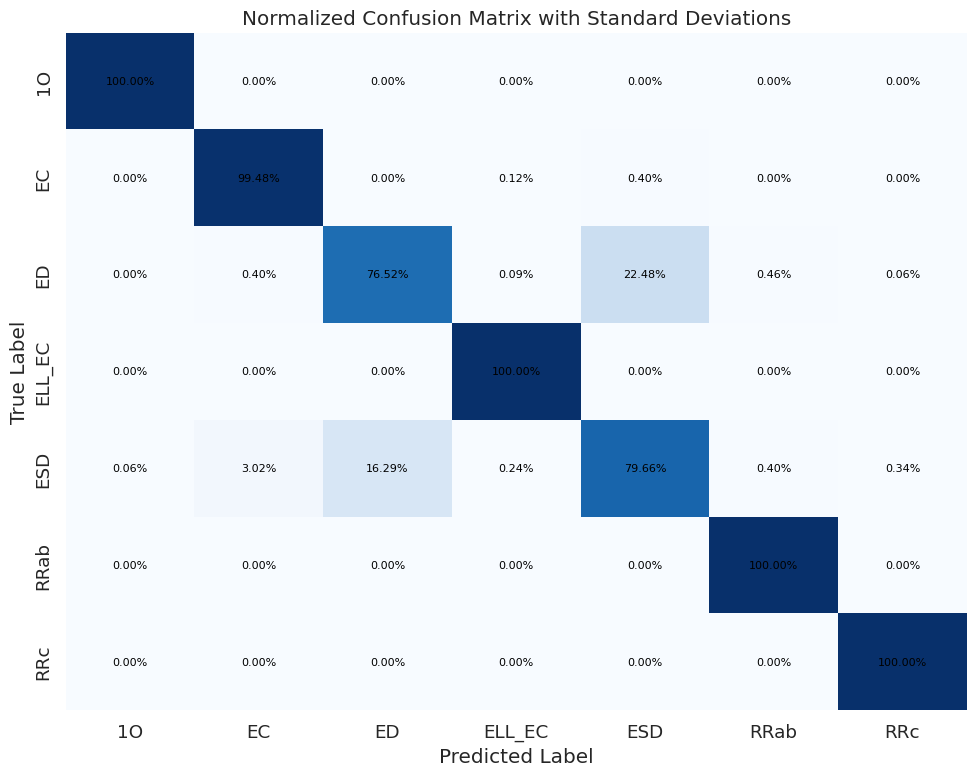

In [ ]:
# Inicializar listas para almacenar resultados de todos los DF
all_accuracy_list = []
all_precision_list = []
all_recall_list = []
all_f1_list = []
all_conf_matrices = []

for df in datas:
  threshold = 2
  class_counts = y_desbalanced.value_counts()
  valid_classes = class_counts[class_counts >= threshold].index
  df_filtered = df[df['Subclass'].isin(valid_classes)]

  # Definimos X e y
  X_desbalanced = df_filtered.drop(["Class_Predictions", "Subclass"], axis=1)
  y_desbalanced = df_filtered["Subclass"]

  # Separamos en train-test
  X_train, X_test, y_train, y_test = train_test_split(X_desbalanced, y_desbalanced, train_size=0.7, stratify=y_desbalanced, random_state=42)

  # Oversampling con RandomOverSampler para la columna 'Class'
  ros_class = RandomOverSampler(random_state=42)
  X_train, y_train = ros_class.fit_resample(X_train, y_train)

  # Definir el modelo
  model = RandomForestClassifier()

  # Definir el espacio de búsqueda de hiperparámetros
  param_grid = {
      'n_estimators': [50, 100, 200],
      'max_depth': [10, 20, 30]
  }

  # Realizar la búsqueda en cuadrícula con validación cruzada de 3
  grid_search = GridSearchCV(model, param_grid, cv=2)
  grid_search.fit(X_train, y_train)

  # Obtener el mejor modelo
  best_model = grid_search.best_estimator_

  # Guardar mejor modelo
  best_model_desbalanced = best_model

  # Realizar validación cruzada de 5 con StratifiedKFold
  cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

  # Inicializar listas para almacenar resultados de cada fold
  accuracy_list = []
  precision_list = []
  recall_list = []
  f1_list = []
  conf_matrices = []

  # Iterar sobre los folds
  for train_index, test_index in cv.split(X_train, y_train):
      X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
      y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

      # Entrenar el mejor modelo con el fold de entrenamiento
      best_model.fit(X_fold_train, y_fold_train)

      # Obtener predicciones en el fold de prueba
      y_fold_pred = best_model.predict(X_fold_test)

      # Calcular métricas en el fold de prueba
      accuracy_list.append(accuracy_score(y_fold_test, y_fold_pred))
      precision_list.append(precision_score(y_fold_test, y_fold_pred, average='macro', zero_division=1))
      recall_list.append(recall_score(y_fold_test, y_fold_pred, average='macro', zero_division=1))
      f1_list.append(f1_score(y_fold_test, y_fold_pred, average='macro', zero_division=1))

      # Calcular matriz de confusión normalizada
      conf_matrix = confusion_matrix(y_fold_test, y_fold_pred, normalize='true')
      conf_matrices.append(conf_matrix)

  # Calcular medias y desviaciones estándar de métricas
  accuracy_mean = np.mean(accuracy_list)
  accuracy_std = np.std(accuracy_list)

  precision_mean = np.mean(precision_list)
  precision_std = np.std(precision_list)

  recall_mean = np.mean(recall_list)
  recall_std = np.std(recall_list)

  f1_mean = np.mean(f1_list)
  f1_std = np.std(f1_list)

  # Imprimir métricas con desviaciones estándar
  print(f"Accuracy: {accuracy_mean} +/- {accuracy_std}")
  print(f"Precision: {precision_mean} +/- {precision_std}")
  print(f"Recall: {recall_mean} +/- {recall_std}")
  print(f"F1 Score: {f1_mean} +/- {f1_std}")

  # Calcular y graficar la matriz de confusión normalizada con desviaciones estándar
  max_shape = max(conf_matrix.shape[0] for conf_matrix in conf_matrices if conf_matrix.shape[0] == conf_matrix.shape[1])
  conf_matrices_mean = np.zeros((max_shape, max_shape), dtype=float)
  conf_matrices_std = np.zeros((max_shape, max_shape), dtype=float)
  count_matrices = 0

  for conf_matrix in conf_matrices:
      if conf_matrix.shape[0] == conf_matrix.shape[1]:
          conf_matrices_mean[:conf_matrix.shape[0], :conf_matrix.shape[1]] += conf_matrix
          count_matrices += 1

  # Calcular promedio
  conf_matrices_mean /= count_matrices

  # Obtener las etiquetas ordenadas correctamente
  sorted_labels = np.unique(np.concatenate([y_fold_test, y_fold_pred]))

  # Configurar visualización con seaborn
  sns.set(font_scale=1.2)
  plt.figure(figsize=(10, 8))

  # Graficar matriz de confusión normalizada con desviaciones estándar
  for i in range(len(sorted_labels)):
      for j in range(len(sorted_labels)):
          label = f"{conf_matrices_mean[i, j]*100:.2f}%"
          text_position = (j + 0.5, i + 0.5)  # Añadir 0.5 para centrar el texto en la celda
          plt.text(*text_position, label, ha='center', va='center', color='black', fontsize=8)

  sns.heatmap(conf_matrices_mean, annot=False, fmt=".2f", cmap="Blues", cbar=False, xticklabels=sorted_labels, yticklabels=sorted_labels)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Normalized Confusion Matrix with Standard Deviations")
  plt.tight_layout()
  plt.show()

  # Almacenar métricas y matrices de confusión de cada iteración
  all_accuracy_list.append(accuracy_list)
  all_precision_list.append(precision_list)
  all_recall_list.append(recall_list)
  all_f1_list.append(f1_list)
  all_conf_matrices.extend(conf_matrices)


All DataFrames - Accuracy: 0.9734868404979239 +/- 0.026692787901014
All DataFrames - Precision: 0.9734991564094072 +/- 0.027182457503327283
All DataFrames - Recall: 0.9734867563227093 +/- 0.02669311655017082
All DataFrames - F1 Score: 0.9732670461942886 +/- 0.026979780123460095


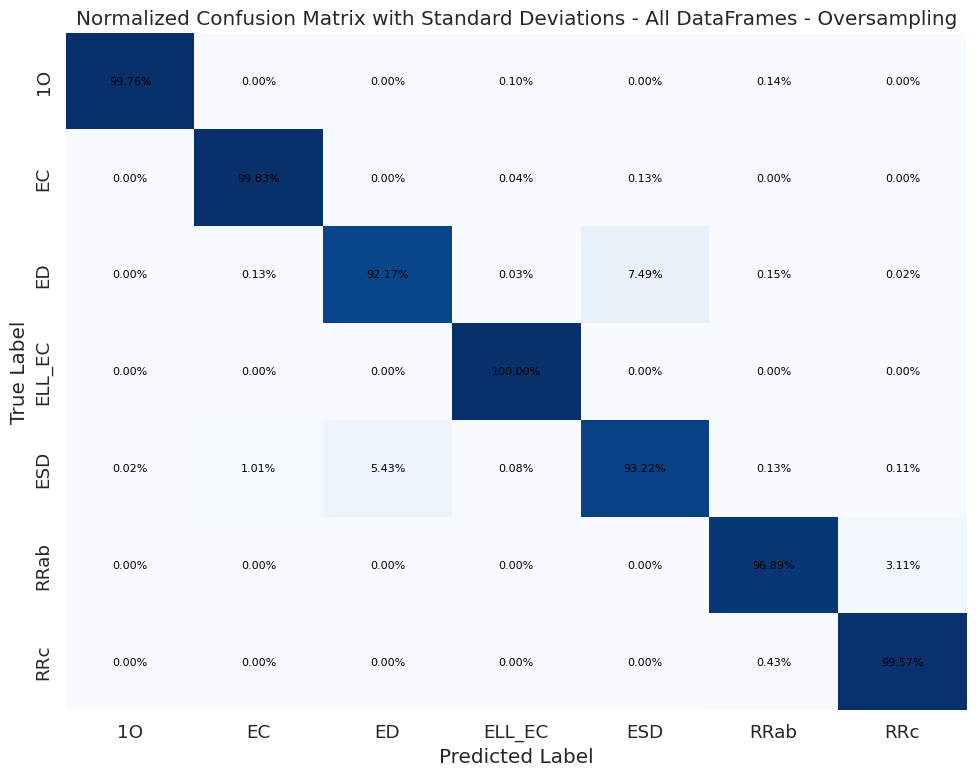

In [ ]:
# Calcular métricas promedio de todos los DF
all_accuracy_mean = np.mean(all_accuracy_list)
all_accuracy_std = np.std(all_accuracy_list)

all_precision_mean = np.mean(all_precision_list)
all_precision_std = np.std(all_precision_list)

all_recall_mean = np.mean(all_recall_list)
all_recall_std = np.std(all_recall_list)

all_f1_mean = np.mean(all_f1_list)
all_f1_std = np.std(all_f1_list)

# Imprimir métricas promedio con desviaciones estándar
print(f"All DataFrames - Accuracy: {all_accuracy_mean} +/- {all_accuracy_std}")
print(f"All DataFrames - Precision: {all_precision_mean} +/- {all_precision_std}")
print(f"All DataFrames - Recall: {all_recall_mean} +/- {all_recall_std}")
print(f"All DataFrames - F1 Score: {all_f1_mean} +/- {all_f1_std}")

# Calcular y graficar la matriz de confusión normalizada con desviaciones estándar para todos los DF
max_shape = max(conf_matrix.shape[0] for conf_matrix in all_conf_matrices if conf_matrix.shape[0] == conf_matrix.shape[1])
conf_matrices_mean_all = np.zeros((max_shape, max_shape), dtype=float)
count_matrices_all = 0

for conf_matrix in all_conf_matrices:
    if conf_matrix.shape[0] == conf_matrix.shape[1]:
        conf_matrices_mean_all[:conf_matrix.shape[0], :conf_matrix.shape[1]] += conf_matrix
        count_matrices_all += 1

# Calcular promedio
conf_matrices_mean_all /= count_matrices_all

# Obtener las etiquetas ordenadas correctamente
sorted_labels_all = np.unique(np.concatenate([y_fold_test, y_fold_pred]))

# Configurar visualización con seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))

# Graficar matriz de confusión normalizada con desviaciones estándar para todos los DF
for i in range(len(sorted_labels_all)):
    for j in range(len(sorted_labels_all)):
        label_all = f"{conf_matrices_mean_all[i, j]*100:.2f}%"
        text_position_all = (j + 0.5, i + 0.5)  # Añadir 0.5 para centrar el texto en la celda
        plt.text(*text_position_all, label_all, ha='center', va='center', color='black', fontsize=8)

sns.heatmap(conf_matrices_mean_all, annot=False, fmt=".2f", cmap="Blues", cbar=False, xticklabels=sorted_labels_all, yticklabels=sorted_labels_all)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix with Standard Deviations - All DataFrames - Oversampling")
plt.tight_layout()
plt.savefig('CM_subclase_directo_all.png')
plt.show()

## 4.2) Clasificar por subclase, con enfoque jerárquico:

In [ ]:
# Diccionario para almacenar las métricas y modelos
results = {}

### 4.2.1) Data Desbalanceada:

En primer lugar, aplicamos el mejor modelo encontrado para clasificar estrellas según clase a todo el dataset:

In [ ]:
X_desbalanced = X.drop(["Class","Subclass"],axis=1)
y_desbalanced = y_subclass

# Mejor clasificador por clase de estrella
rf_class = best_model_oversampled
class_predictions = rf_class.predict(X_desbalanced)

# Copiamos las predicciones al conjunto X_desbalanced
X_desbalanced_with_predictions = X_desbalanced.copy()
X_desbalanced_with_predictions['Class_Predictions'] = class_predictions
# Convertir la columna 'Class_Predictions' en variables dummy
X_desbalanced_with_predictions = pd.get_dummies(X_desbalanced_with_predictions, columns=['Class_Predictions'], prefix='Class_Predictions')
print(X_desbalanced_with_predictions)

# Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X_desbalanced_with_predictions, y_desbalanced, train_size=0.7, stratify=y_desbalanced, random_state=42)

       MHPS_ratio_r  MHPS_low_r  MHPS_high_r  MHPS_non_zero_r  MHPS_PN_flag_r  \
0          0.999959    0.999989     0.000022         0.591667             0.0   
1          0.999989    0.999995     0.000039         0.577778             0.0   
2          0.999995    0.999817     0.003097         0.372222             0.0   
3          0.999999    0.999996     0.000629         0.358333             0.0   
4          1.000000    0.999998     0.018219         0.447222             0.0   
...             ...         ...          ...              ...             ...   
28346      0.999996    0.999983     0.000385         0.563889             0.0   
28347      0.999999    0.999985     0.002176         0.511111             0.0   
28348      0.999985    0.999900     0.000539         0.486111             0.0   
28349      1.000000    0.999990     0.001795         0.158333             0.0   
28350      1.000000    0.999989     0.013346         0.363889             0.0   

       MHPS_ratio_u  MHPS_l

Optimizamos los hiperparámetros con un grid search:

In [ ]:
# Definir el clasificador Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 30] # se pueden agregar más hiperparámetros
}

# Inicializar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=2, scoring='accuracy')

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Obtener la precisión del mejor modelo en el conjunto de prueba
best_model_desbalanced = grid_search.best_estimator_
accuracy = best_model_desbalanced.score(X_test, y_test)
print("Precisión del mejor modelo en el conjunto de prueba:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Mejores hiperparámetros: {'max_depth': 30, 'n_estimators': 100}
Precisión del mejor modelo en el conjunto de prueba: 0.7334822478250647


Obtenemos las principales métricas:

Precisión: 0.7334822478250647
Reporte de clasificación:
               precision    recall  f1-score   support

          1O       0.63      0.79      0.70       308
    1O_20_3O       1.00      0.00      0.00         1
       1O_2O       0.00      1.00      0.00         0
       1O_3O       1.00      0.00      0.00         1
          2O       1.00      0.00      0.00         4
          EC       0.30      0.04      0.07       216
          ED       0.68      0.83      0.75      1419
      ED_ESD       1.00      0.00      0.00        94
      ED_TEB       1.00      0.00      0.00         1
      ED_VAR       1.00      0.00      0.00        17
      ELL_EC       0.29      0.05      0.08        44
         ESD       0.47      0.48      0.47       970
     ESD_DPV       1.00      0.00      0.00         4
           F       0.89      0.85      0.87       444
        F_10       1.00      0.00      0.00        15
     F_10_20       1.00      0.00      0.00         1
        RRab       0.90 

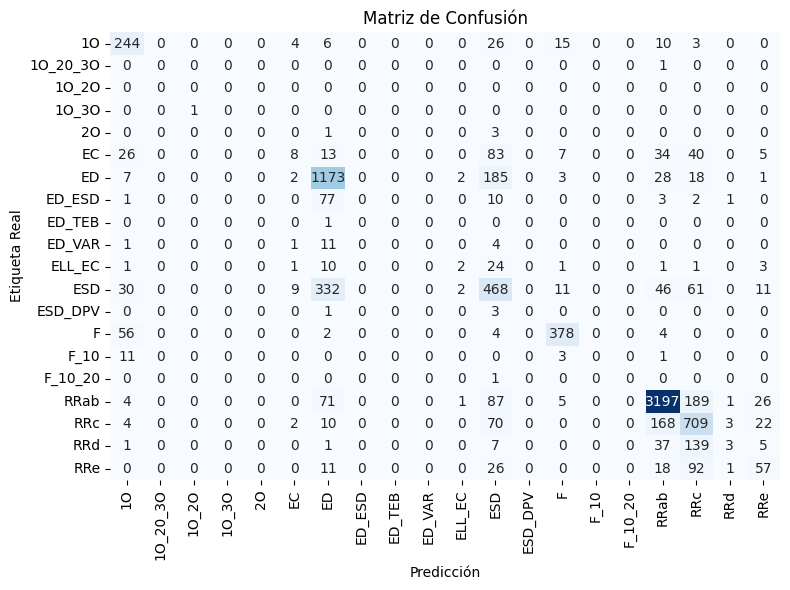

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


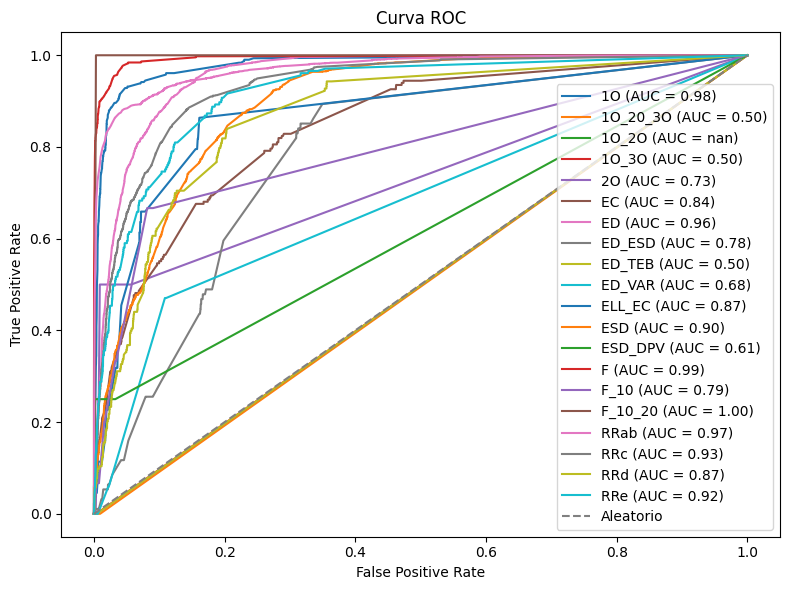

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = best_model_desbalanced.predict(X_test)

# Guardamos las principales métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

results["RF desbalanceado"] = {
    'best_params': grid_search.best_params_,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'best_model': best_model_desbalanced
}

# Calcular y mostrar la precisión, recall y F1-score para problemas multiclase
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)
print("Precisión:", accuracy)
print("Reporte de clasificación:\n", classification_rep)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=best_model_desbalanced.classes_, yticklabels=best_model_desbalanced.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.savefig('CM_Modelo_jerarquico_subclase_desbalanced.png')
plt.show()

# Calcular y mostrar la curva ROC y el área bajo la curva (AUC) para problemas multiclase
y_prob = best_model_desbalanced.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=best_model_desbalanced.classes_)

# Calcular el AUC para cada clase
roc_aucs = []
fpr = dict()
tpr = dict()
for i in range(len(best_model_desbalanced.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr[i], tpr[i])
    roc_aucs.append(roc_auc)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
for i in range(len(best_model_desbalanced.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'{best_model_desbalanced.classes_[i]} (AUC = {roc_aucs[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatorio')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.tight_layout()
plt.savefig('ROC_Modelo_jerarquico_subclase_desbalanced.png')
plt.show()

### 4.2.2) Data Oversampleada:

En primer lugar, aplicamos el mejor modelo encontrado para clasificar estrellas según clase a todo el dataset:

In [ ]:
X_desbalanced = X.drop(["Class","Subclass"],axis=1)
y_desbalanced = y_subclass

# Mejor clasificador por clase de estrella
rf_class = best_model_oversampled
class_predictions = rf_class.predict(X_desbalanced)

# Copiamos las predicciones al conjunto X_desbalanced
X_desbalanced_with_predictions = X_desbalanced.copy()
X_desbalanced_with_predictions['Class_Predictions'] = class_predictions
# Convertir la columna 'Class_Predictions' en variables dummy
X_desbalanced_with_predictions = pd.get_dummies(X_desbalanced_with_predictions, columns=['Class_Predictions'], prefix='Class_Predictions')
print(X_desbalanced_with_predictions)

# Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X_desbalanced_with_predictions, y_desbalanced, train_size=0.7, stratify=y_desbalanced, random_state=42)

# Oversampling con RandomOverSampler para la columna 'Class'
ros_class = RandomOverSampler(random_state=42)
X_train, y_train = ros_class.fit_resample(X_train, y_train)
print("Tamaño de las clases 'Class' en el conjunto de entrenamiento, después de oversampling:\n", y_train.value_counts())

       MHPS_ratio_r  MHPS_low_r  MHPS_high_r  MHPS_non_zero_r  MHPS_PN_flag_r  \
0          0.999959    0.999989     0.000022         0.591667             0.0   
1          0.999989    0.999995     0.000039         0.577778             0.0   
2          0.999995    0.999817     0.003097         0.372222             0.0   
3          0.999999    0.999996     0.000629         0.358333             0.0   
4          1.000000    0.999998     0.018219         0.447222             0.0   
...             ...         ...          ...              ...             ...   
28346      0.999996    0.999983     0.000385         0.563889             0.0   
28347      0.999999    0.999985     0.002176         0.511111             0.0   
28348      0.999985    0.999900     0.000539         0.486111             0.0   
28349      1.000000    0.999990     0.001795         0.158333             0.0   
28350      1.000000    0.999989     0.013346         0.363889             0.0   

       MHPS_ratio_u  MHPS_l

Optimizamos los hiperparámetros con un grid search:

In [ ]:
# Definir el clasificador Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 30] # se pueden agregar más hiperparámetros
}

# Inicializar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=2, scoring='accuracy')

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Obtener la precisión del mejor modelo en el conjunto de prueba
best_model_desbalanced = grid_search.best_estimator_
accuracy = best_model_desbalanced.score(X_test, y_test)
print("Precisión del mejor modelo en el conjunto de prueba:", accuracy)

Mejores hiperparámetros: {'max_depth': 30, 'n_estimators': 100}
Precisión del mejor modelo en el conjunto de prueba: 0.777451210909946


Obtenemos las principales métricas:

Precisión: 0.777451210909946
Reporte de clasificación:
               precision    recall  f1-score   support

          1O       0.75      0.91      0.82       308
    1O_20_3O       1.00      0.00      0.00         1
       1O_2O       0.00      1.00      0.00         0
       1O_3O       1.00      0.00      0.00         1
          2O       1.00      0.00      0.00         4
          EC       0.74      0.13      0.23       216
          ED       0.73      0.83      0.78      1419
      ED_ESD       1.00      0.00      0.00        94
      ED_TEB       1.00      0.00      0.00         1
      ED_VAR       1.00      0.00      0.00        17
      ELL_EC       0.33      0.02      0.04        44
         ESD       0.55      0.64      0.59       970
     ESD_DPV       1.00      0.00      0.00         4
           F       0.95      0.86      0.90       444
        F_10       1.00      0.00      0.00        15
     F_10_20       1.00      0.00      0.00         1
        RRab       0.92  

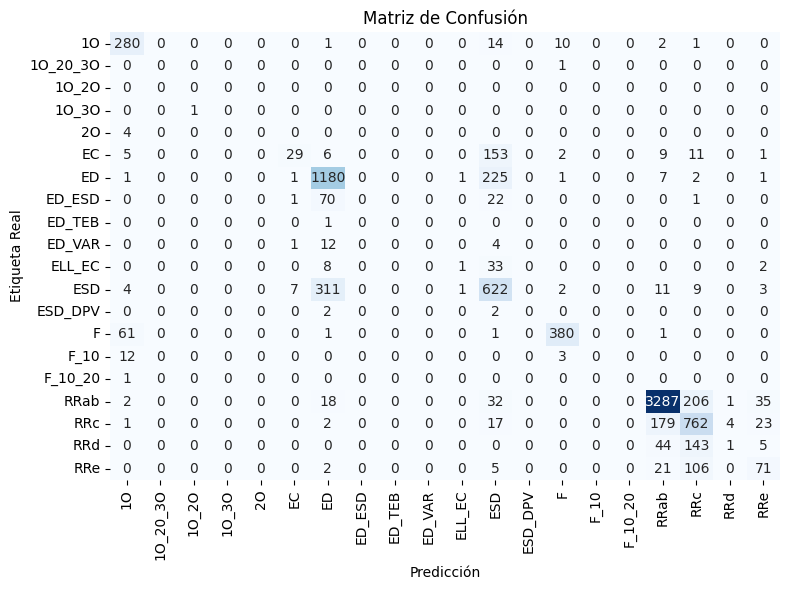

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


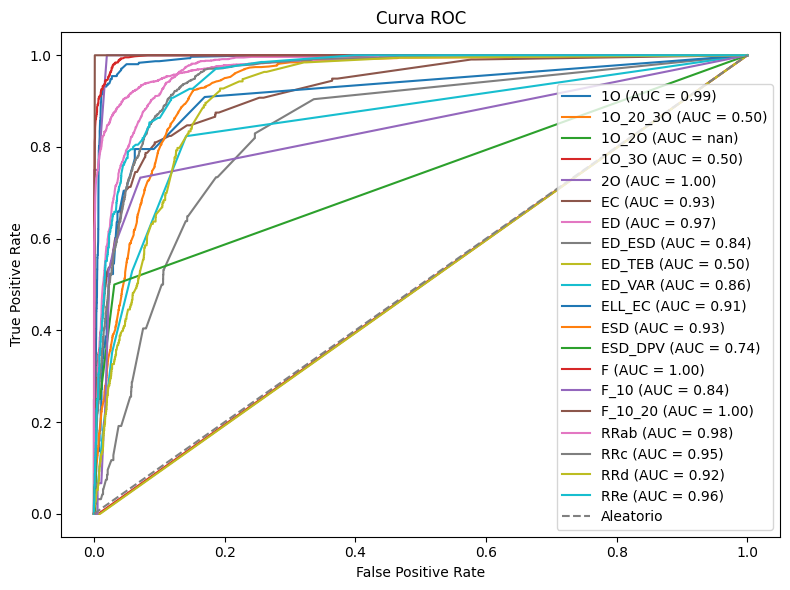

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = best_model_desbalanced.predict(X_test)

# Guardamos las principales métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

results["RF desbalanceado"] = {
    'best_params': grid_search.best_params_,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'best_model': best_model_desbalanced
}

# Calcular y mostrar la precisión, recall y F1-score para problemas multiclase
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)
print("Precisión:", accuracy)
print("Reporte de clasificación:\n", classification_rep)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=best_model_desbalanced.classes_, yticklabels=best_model_desbalanced.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.savefig('CM_Modelo_jerarquico_subclase_overbalanced.png')
plt.show()

# Calcular y mostrar la curva ROC y el área bajo la curva (AUC) para problemas multiclase
y_prob = best_model_desbalanced.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=best_model_desbalanced.classes_)

# Calcular el AUC para cada clase
roc_aucs = []
fpr = dict()
tpr = dict()
for i in range(len(best_model_desbalanced.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr[i], tpr[i])
    roc_aucs.append(roc_auc)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
for i in range(len(best_model_desbalanced.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'{best_model_desbalanced.classes_[i]} (AUC = {roc_aucs[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatorio')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.tight_layout()
plt.savefig('ROC_Modelo_jerarquico_subclase_overbalanced.png')
plt.show()

### 4.3.4) Comparar los mejores modelos de cada enfoque:

In [ ]:
# Crear un DataFrame con los resultados
df_results = pd.DataFrame(results).T
df_results.index.name = 'Dataset'
df_results

,accuracy,best_model,best_params,f1,precision,recall
Dataset,,,,,,
RF desbalanceado,0.777451,"(DecisionTreeClassifier(max_depth=30, max_feat...","{'max_depth': 30, 'n_estimators': 100}",0.269571,0.763643,0.321771
